# Modélisation et évaluation des modèles

**Auteur :** Mehdi MUNIM

**Date :** 2023-11-26

**Description :**

Ce notebook entraîne et évalue différents modèles de Machine Learning pour la classification de sentiment sur les données de tweets prétraitées.

In [7]:
#@title 1. Importation des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sys
import tensorflow as tf 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Ajouter le chemin du dossier src pour importer les modules
sys.path.append('../src')
import model
import evaluation

## 2. Chargement des données

In [8]:
#@title 2.1 Chargement des données

# Chemin d'accès au dossier data
data_path = '../data/processed/'

# Charger les données prétraitées

## Données non vectorisées
X_train = pickle.load(open(data_path + 'X_train.pickle', 'rb'))
X_test = pickle.load(open(data_path + 'X_test.pickle', 'rb'))

## Labels
y_train = pickle.load(open(data_path + 'y_train.pickle', 'rb'))
y_test = pickle.load(open(data_path + 'y_test.pickle', 'rb'))

## Vectorisées TF-IDF
X_train_tfidf = pickle.load(open(data_path + 'X_train_tfidf.pickle', 'rb'))
X_test_tfidf = pickle.load(open(data_path + 'X_test_tfidf.pickle', 'rb'))

## Word2vec
X_train_w2v = pickle.load(open(data_path + 'X_train_word2vec.pickle', 'rb'))
X_test_w2v = pickle.load(open(data_path + 'X_test_word2vec.pickle', 'rb'))


## Doc2Vec
X_train_d2v = pickle.load(open(data_path + 'X_train_doc2vec.pickle', 'rb'))
X_test_d2v = pickle.load(open(data_path + 'X_test_doc2vec.pickle', 'rb'))


## 3. Entraînement et évaluation des modèles

Accuracy: 0.7259
Precision: 0.7147
Recall: 0.7435
F1-score: 0.7288


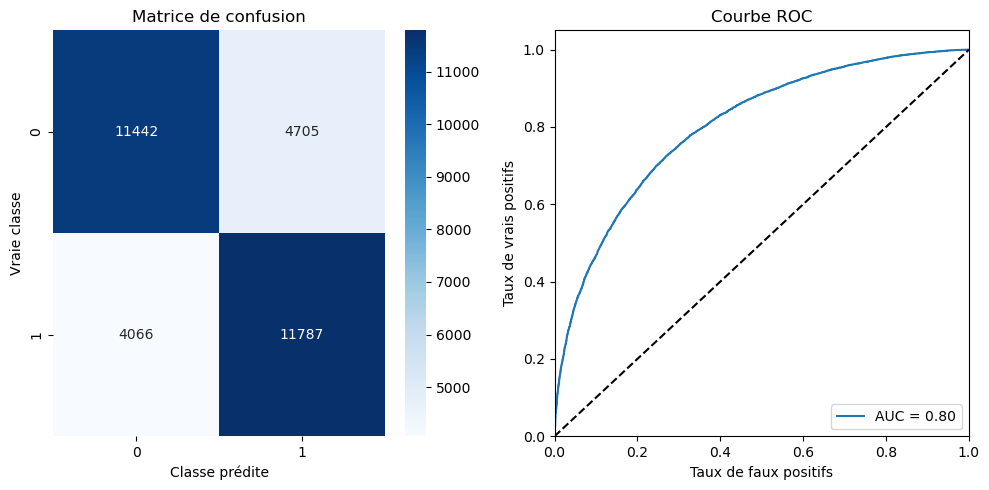

In [9]:
#@title 3.1 Entraînement et évaluation du modèle de régression logistique

from sklearn.linear_model import LogisticRegression

# Créer et entraîner le modèle de régression logistique
model_lr = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)
model_lr.fit(X_train_w2v, y_train)

# Évaluer le modèle
evaluation.evaluer_modele(model_lr, X_test_w2v, y_test)

# Sauvegarder le modèle avec pickle
with open('../models/mon_modele_lr.pkl', 'wb') as f:
    pickle.dump(model_lr, f)

Epoch 1/10
3200/3200 [==============================] - 8s 2ms/step - loss: 0.5781 - accuracy: 0.6947 - val_loss: 0.5447 - val_accuracy: 0.7204
Epoch 2/10
3200/3200 [==============================] - 7s 2ms/step - loss: 0.5588 - accuracy: 0.7140 - val_loss: 0.5441 - val_accuracy: 0.7244
Epoch 3/10
3200/3200 [==============================] - 7s 2ms/step - loss: 0.5544 - accuracy: 0.7180 - val_loss: 0.5393 - val_accuracy: 0.7281
Epoch 4/10
3200/3200 [==============================] - 7s 2ms/step - loss: 0.5513 - accuracy: 0.7192 - val_loss: 0.5401 - val_accuracy: 0.7276
Epoch 5/10
3200/3200 [==============================] - 7s 2ms/step - loss: 0.5499 - accuracy: 0.7213 - val_loss: 0.5368 - val_accuracy: 0.7288
Epoch 6/10
3200/3200 [==============================] - 7s 2ms/step - loss: 0.5488 - accuracy: 0.7214 - val_loss: 0.5346 - val_accuracy: 0.7288
Epoch 7/10
3200/3200 [==============================] - 7s 2ms/step - loss: 0.5473 - accuracy: 0.7226 - val_loss: 0.5364 - val_accuracy:

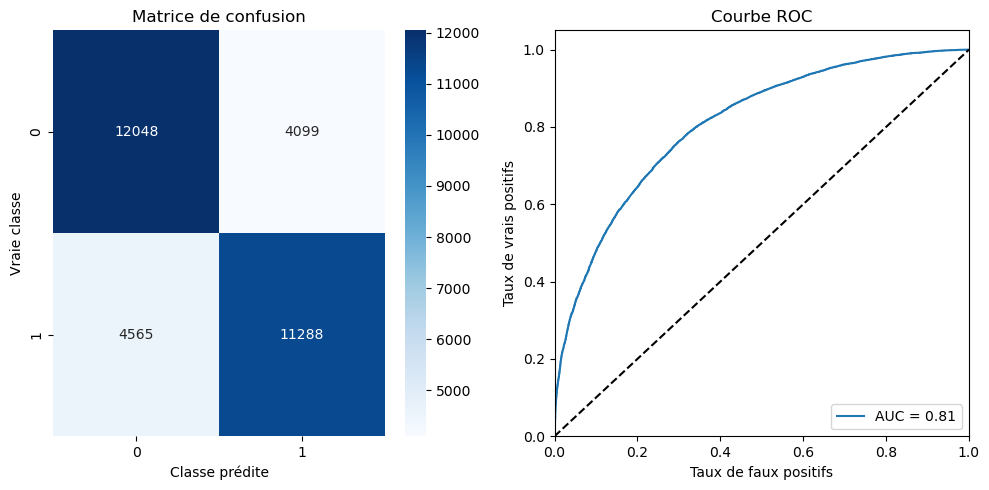

In [4]:
#@title 3.2 Entraînement et évaluation du modèle MLP

# Créer et entraîner le modèle MLP
model_mlp = model.create_mlp_model(input_shape=(X_train_w2v.shape[1],))
model_mlp.fit(X_train_w2v, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Évaluer le modèle
evaluation.evaluer_modele(model_mlp, X_test_w2v, y_test)

# Sauvegarder le modèle
model.save_model_weights(model_mlp, "model_mlp")

Epoch 1/10
3200/3200 [==============================] - 22s 7ms/step - loss: 0.5606 - accuracy: 0.7063 - val_loss: 0.5455 - val_accuracy: 0.7200
Epoch 2/10
3200/3200 [==============================] - 21s 6ms/step - loss: 0.5444 - accuracy: 0.7216 - val_loss: 0.5402 - val_accuracy: 0.7243
Epoch 3/10
3200/3200 [==============================] - 20s 6ms/step - loss: 0.5398 - accuracy: 0.7241 - val_loss: 0.5358 - val_accuracy: 0.7268
Epoch 4/10
3200/3200 [==============================] - 20s 6ms/step - loss: 0.5369 - accuracy: 0.7262 - val_loss: 0.5346 - val_accuracy: 0.7283
Epoch 5/10
3200/3200 [==============================] - 20s 6ms/step - loss: 0.5354 - accuracy: 0.7261 - val_loss: 0.5357 - val_accuracy: 0.7240
Epoch 6/10
3200/3200 [==============================] - 20s 6ms/step - loss: 0.5333 - accuracy: 0.7284 - val_loss: 0.5301 - val_accuracy: 0.7306
Epoch 7/10
3200/3200 [==============================] - 20s 6ms/step - loss: 0.5319 - accuracy: 0.7292 - val_loss: 0.5313 - val_ac

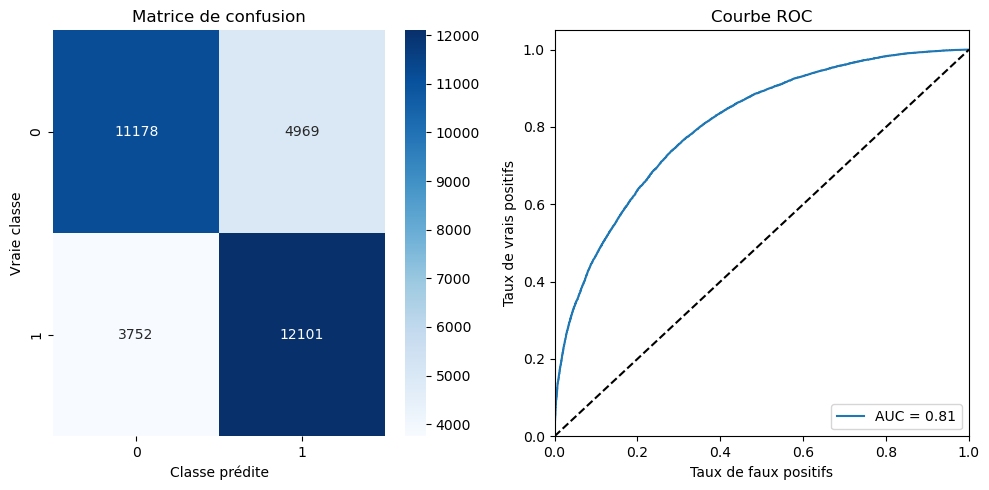

In [5]:
#@title 3.3 Entraînement et évaluation du modèle CNN

# Reshape les données pour le modèle CNN
X_train_cnn = np.reshape(X_train_w2v, (X_train_w2v.shape[0], X_train_w2v.shape[1], 1))
X_test_cnn = np.reshape(X_test_w2v, (X_test_w2v.shape[0], X_test_w2v.shape[1], 1))

# Créer et entraîner le modèle CNN
model_cnn = model.create_cnn_model(input_shape=(X_train_cnn.shape[1], 1))
model_cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Évaluer le modèle
evaluation.evaluer_modele(model_cnn, X_test_cnn, y_test)

# Sauvegarder le modèle
model.save_model_weights(model_cnn, "model_cnn")

## Entraînement & évaluation du modèle

Epoch 1/10
3200/3200 [==============================] - 11s 3ms/step - loss: 0.5602 - accuracy: 0.7074 - val_loss: 0.5421 - val_accuracy: 0.7194
Epoch 2/10
3200/3200 [==============================] - 10s 3ms/step - loss: 0.5436 - accuracy: 0.7215 - val_loss: 0.5341 - val_accuracy: 0.7288
Epoch 3/10
3200/3200 [==============================] - 10s 3ms/step - loss: 0.5384 - accuracy: 0.7247 - val_loss: 0.5314 - val_accuracy: 0.7296
Epoch 4/10
3200/3200 [==============================] - 10s 3ms/step - loss: 0.5354 - accuracy: 0.7271 - val_loss: 0.5288 - val_accuracy: 0.7332
Epoch 5/10
3200/3200 [==============================] - 10s 3ms/step - loss: 0.5323 - accuracy: 0.7301 - val_loss: 0.5274 - val_accuracy: 0.7326
Epoch 6/10
3200/3200 [==============================] - 10s 3ms/step - loss: 0.5310 - accuracy: 0.7302 - val_loss: 0.5334 - val_accuracy: 0.7275
Epoch 7/10
3200/3200 [==============================] - 10s 3ms/step - loss: 0.5296 - accuracy: 0.7312 - val_loss: 0.5268 - val_ac

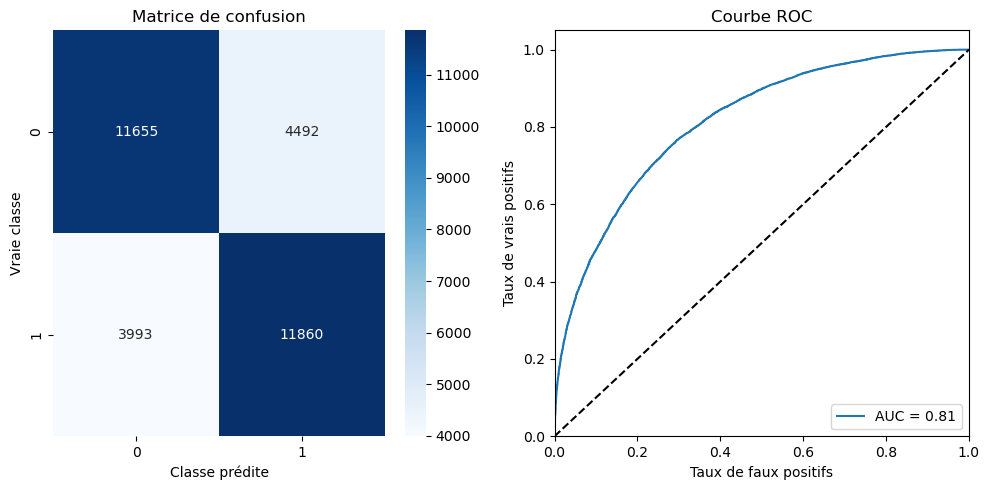

In [6]:
#@title 3.4 Entraînement et évaluation du modèle LSTM

# Créer et entraîner le modèle LSTM
model_lstm = model.create_lstm_model(input_shape=(X_train_w2v.shape[1],))
model_lstm.fit(X_train_w2v, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Évaluer le modèle
evaluation.evaluer_modele(model_lstm, X_test_w2v, y_test)

# Sauvegarder le modèle
model.save_model_weights(model_lstm, "model_lstm")

In [10]:
#@title 3.5 Entraînement et évaluation du modèle BERT

# Créer et entraîner le modèle BERT
model_bert, tokenizer = model.create_bert_model("bert-base-uncased")

# Tokenizer les tweets d'entraînement et de test
X_train_bert = tokenizer(X_train.tolist(), padding=True, truncation=True, return_tensors="tf")
X_test_bert = tokenizer(X_test.tolist(), padding=True, truncation=True, return_tensors="tf")

# Convertir les labels en tenseurs
y_train_bert = tf.convert_to_tensor(y_train)
y_test_bert = tf.convert_to_tensor(y_test)

# Entraîner le modèle
history = model_bert.fit(
    x={"input_ids": X_train_bert["input_ids"], "attention_mask": X_train_bert["attention_mask"]},
    y=y_train_bert,
    validation_split=0.2,
    epochs=3,
    batch_size=32,
)

# Évaluer le modèle
y_pred_bert = model_bert.predict(X_test_bert).logits
y_pred_bert = np.argmax(y_pred_bert, axis=1)
evaluation.evaluer_modele(model_bert,
                          {"input_ids": X_test_bert["input_ids"], "attention_mask": X_test_bert["attention_mask"]},
                          y_test_bert)


# Sauvegarder le modèle
model.save_model_weights(model_bert, "model_bert")

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


KeyboardInterrupt: 

In [ ]:
#@title 3.6 Entraînement et évaluation du modèle USE

import tensorflow_hub as hub

# Charger le modèle USE
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Encoder les tweets
X_train_use = embed(X_train)
X_test_use = embed(X_test)

# Créer et entraîner le modèle USE
model_use = model.create_use_model(input_shape=(X_train_use.shape[1],))
model_use.fit(X_train_use, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Évaluer le modèle
evaluation.evaluer_modele(model_use, X_test_use, y_test)

# Sauvegarder le modèle
model.save_model_weights(model_use, "model_use")

## 4. Comparaison des modèles

In [9]:
#@title Comparaison des modèles

import time

# Fonction pour comparer les modèles en utilisant les métriques d'évaluation
def comparer_modeles(model, X_test, y_test):
    
    # Calculer le temps de prédiction
    start_time = time.time()
    y_pred = model.predict(X_test)
    end_time = time.time()
    predict_time = end_time - start_time

    y_pred = (y_pred > 0.5).astype(int)  # Convertir les probabilités en classes prédites si nécessaire
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1, predict_time

# Comparaison des modèles
modeles = [model_lr, model_mlp, model_lstm]
noms_modeles = ['Régression Logistique', 'MLP', 'LSTM']

# Calculer les métriques pour chaque modèle
resultats = []
for model in modeles:
    resultats.append(comparer_modeles(model, X_test_w2v, y_test))

# Créer un DataFrame pour afficher les résultats
comparaison = pd.DataFrame(resultats, columns=['Accuracy', 'Precision', 'Recall', 'F1-score', 'Predict Time'], index=noms_modeles)

# Afficher les résultats
print(comparaison)

1000/1000 [==============================] - 2s 2ms/step
                       Accuracy  Precision    Recall  F1-score  Predict Time
Régression Logistique  0.727656   0.716723  0.744528  0.730361      0.152123
MLP                    0.726094   0.733035  0.703211  0.717813      2.291727
LSTM                   0.733781   0.738955  0.715322  0.726946      2.068556
